In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data_set_path = "../dataset/dataset.csv"

In [3]:
training_data = pd.read_csv(data_set_path)

In [4]:
bots = training_data[training_data.bot==1]
# bots

In [5]:
non_bots = training_data[training_data.bot==0]

In [6]:
#Visualizing null values

In [7]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

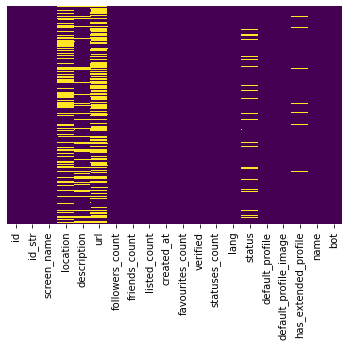

In [8]:
sns.heatmap(training_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
# Bots and NonBots Friends/Followers

<AxesSubplot:title={'center':'NonBots Friends/Followers'}, xlabel='friends_count', ylabel='followers_count'>

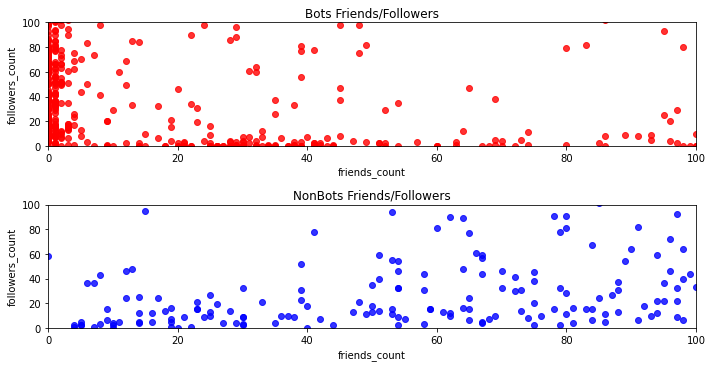

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends/Followers')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
sns.regplot(x=bots.friends_count, y=bots.followers_count, color='red', label='Bots')
plt.subplot(2,1,2)
plt.title('NonBots Friends/Followers')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()
sns.regplot(x=non_bots.friends_count, y=non_bots.followers_count, color='blue', label='NonBots')

In [11]:
bots['friends_by_followers'] = bots.friends_count / bots.followers_count
bots[bots.friends_by_followers<1].shape

non_bots['friends_by_followers'] = non_bots.friends_count / non_bots.followers_count
non_bots[non_bots.friends_by_followers<1].shape

(952, 21)

(10000.0, 20000.0)

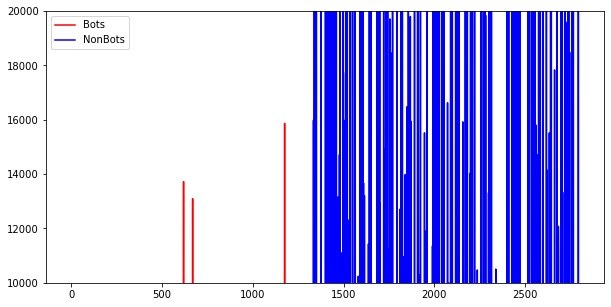

In [12]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='red', label='Bots')
plt.plot(non_bots.listed_count, color='blue', label='NonBots')
plt.legend(loc='upper left')
plt.ylim(10000,20000)

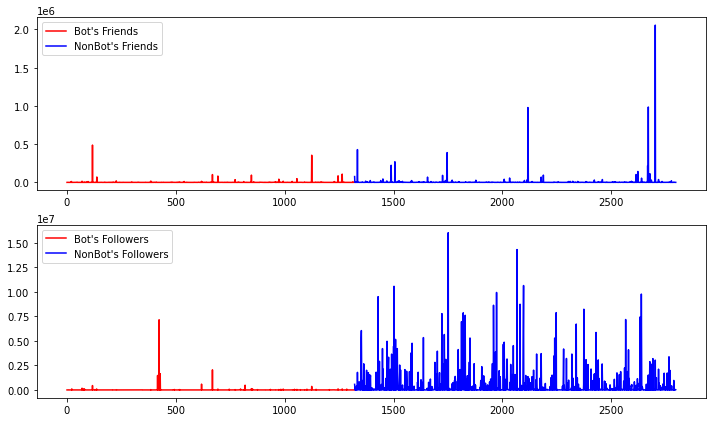

In [13]:
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = non_bots[non_bots.listed_count<16000]

plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color='red', label='Bot\'s Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='blue', label='NonBot\'s Friends')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color='red', label='Bot\'s Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='blue', label='NonBot\'s Followers')
plt.legend(loc='upper left')

In [14]:
training_data.corr(method='spearman')

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot
id,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.522990,0.166601,0.652131
followers_count,-0.672925,1.000000,0.375522,0.896126,0.457363,0.709732,0.649117,-0.496899,-0.293838,-0.468430
friends_count,-0.402346,0.375522,1.000000,0.204403,0.641529,0.356452,0.111118,-0.296358,-0.097607,-0.483105
listed_count,-0.615005,0.896126,0.204403,1.000000,0.349059,0.694340,0.684976,-0.447376,-0.269035,-0.318445
favourites_count,-0.439430,0.457363,0.641529,0.349059,1.000000,0.394227,0.295108,-0.348043,-0.226956,-0.526228
verified,-0.611899,0.709732,0.356452,0.694340,0.394227,1.000000,0.333278,-0.404650,-0.132298,-0.508555
statuses_count,-0.451945,0.649117,0.111118,0.684976,0.295108,0.333278,1.000000,-0.375918,-0.289999,-0.089018
default_profile,0.522990,-0.496899,-0.296358,-0.447376,-0.348043,-0.404650,-0.375918,1.000000,0.246979,0.407748
default_profile_image,0.166601,-0.293838,-0.097607,-0.269035,-0.226956,-0.132298,-0.289999,0.246979,1.000000,0.139669
bot,0.652131,-0.468430,-0.483105,-0.318445,-0.526228,-0.508555,-0.089018,0.407748,0.139669,1.000000


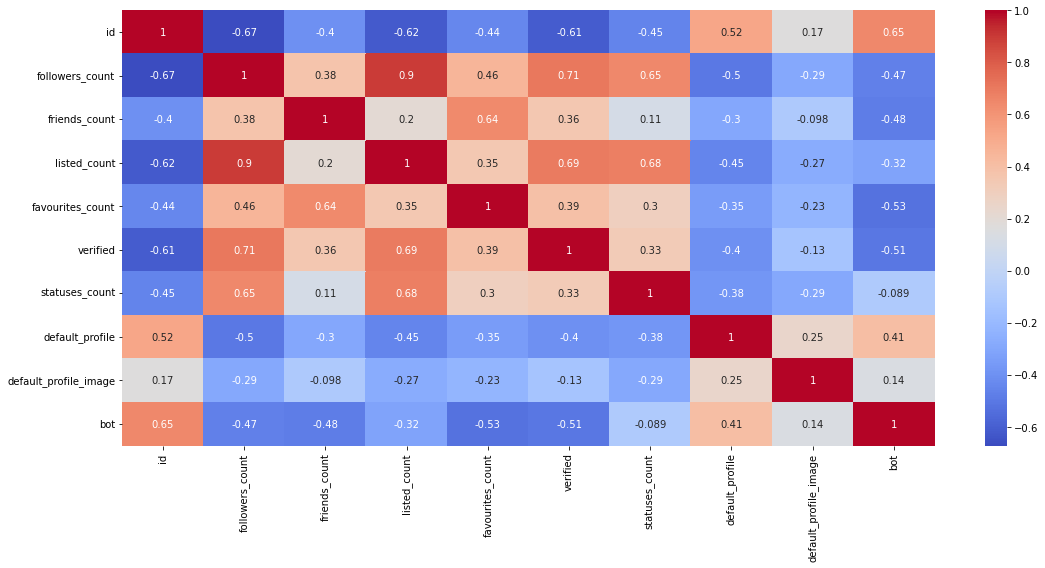

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(training_data.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.savefig("spearman")
plt.show()